In [1]:
#If the code is running on Google Colab, I need to mount the GDrive into the workspace to import my homemade dependencies
google_colab = True
if google_colab:
    #Mount google drive into google colab working space
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    #Copy my functions into Colab workspace
    !cp "/content/drive/MyDrive/Colab Notebooks/Federated Learning/models.py" .

Mounted at /content/drive


In [2]:
#Imports
import models
import numpy as np
import time
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
#Simulation Variables
K = 10
local_epochs = 2
steps_per_epoch = None #None = iterate until entire dataset is covered once
N = 20 #Number of communication rounds
batch_norm = True
dropout = True

In [4]:
#Download global dataset and split it into K local datasets
local_datasets, global_dataset = models.load_dataset(K)
#CIFAR10 labels
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#Create K local models and one global model with randomly initialized weights
model_list, global_model = models.setup_models(K, len(labels), batch_norm, dropout)

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
#History vectors for plotting
train_acc = np.zeros((N, 1))
test_acc = np.zeros((N, 1))

In [6]:
#Federated learning loop
start = time.time()
for i in range(N):
    print("Communication round " + str(i+1) + ".")
    #Broadcast to devices
    model_list, global_model = models.model_broadcast(model_list, global_model)

    #Local training
    model_list = models.local_training(model_list, local_datasets, local_epochs, steps_per_epoch)

    #Global Aggregation
    model_list, global_model = models.global_update(model_list, global_model)

    #Store history
    train_acc[i] = global_model.evaluate(global_dataset[0], global_dataset[1], batch_size=128, verbose=0)[1]
    test_acc[i] = global_model.evaluate(global_dataset[2], global_dataset[3], batch_size=128, verbose=0)[1]

end = time.time()
print("Time spent on Federated Learning =", end-start)

Communication round 1.
Communication round 2.
Communication round 3.
Communication round 4.
Communication round 5.
Communication round 6.
Communication round 7.
Communication round 8.
Communication round 9.
Communication round 10.
Communication round 11.
Communication round 12.
Communication round 13.
Communication round 14.
Communication round 15.
Communication round 16.
Communication round 17.
Communication round 18.
Communication round 19.
Communication round 20.
Time spent on Federated Learning = 366.2396733760834


In [7]:
#Accuracy evaluation 
results = global_model.evaluate(global_dataset[0], global_dataset[1], batch_size=128, verbose=0) 
print("train loss, train acc of global model:", results) 
results = global_model.evaluate(global_dataset[2], global_dataset[3], batch_size=128, verbose=0) 
print("test loss, test acc of global model:", results) 

train loss, train acc of global model: [0.5505099296569824, 0.805620014667511]
test loss, test acc of global model: [0.6983007192611694, 0.7573000192642212]


Text(0.5, 1.0, 'Accuracy Curves')

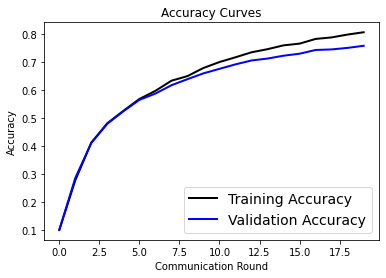

In [8]:
#Plotting
plt.figure(figsize=[6,4])
plt.plot(train_acc, 'black', linewidth=2.0)
plt.plot(test_acc, 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Communication Round', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)